# This AI model uses the CNN to classify objects into 10 classes of fashion clothes viz. "t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", and "ankle boot".

##### The data is from the MNIST data set of fashion. It contains 60000 training images and 10000 testing images. With each imag ebeing 28x28 grayscale images.

### Loading the dataset from keras

In [1]:
import tensorflow as tf

In [2]:
# Downloading the data set and splitting it
mnist = tf.keras.datasets
(X_train, y_train), (X_test, y_test) = mnist.fashion_mnist.load_data()

In [3]:
# mnist fashion data set contains 60000 training samples
# and 10000 testing samples
print("-----------------------------------------------------------------------")
print("The length of training set (X) is", len(X_train))
print("The length of training set (y) is", len(y_train))
print("-----------------------------------------------------------------------")
print("The length of testing set (X) is", len(X_test))
print("The length of testing set (y) is", len(y_test))
print("-----------------------------------------------------------------------")

# Shape of the image is 28x28
print("The shape of the 6th element in the training set is", X_train[5].shape)
print("")
print("The 6th element from the training set consists of:-\n", X_train[5])
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The length of training set (X) is 60000
The length of training set (y) is 60000
-----------------------------------------------------------------------
The length of testing set (X) is 10000
The length of testing set (y) is 10000
-----------------------------------------------------------------------
The shape of the 6th element in the training set is (28, 28)

The 6th element from the training set consists of:-
 [[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 1

In [4]:
# For visualisation and mathematical operations
import matplotlib.pyplot as plt
import numpy as np

#### **Visualising Some Sample Images**

In [5]:
# First we shall make a tuple named 'classes' which will store all the class
# names of the data-set in the same order as is in MNIST-Fashion data-set
classes = (
    "t-shirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal", 
    "shirt",
    "sneaker",
    "bag",
    "ankle boot"
)

In [6]:
# Function taking the index as the only argument and plots the image
def plotImage(index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_train[index], cmap="Greys")
    plt.axis("off")
    plt.title("{} ({})".format(classes[y_train[index]], y_train[index]))
# end function plotImage()

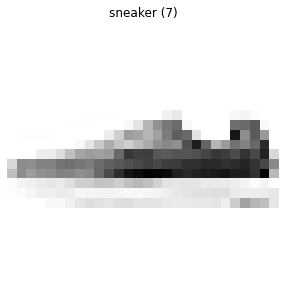

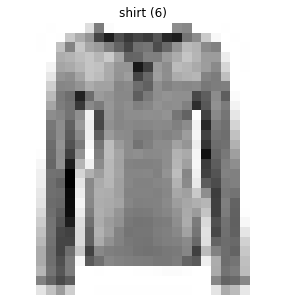

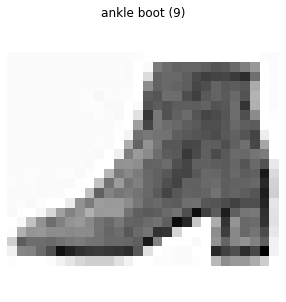

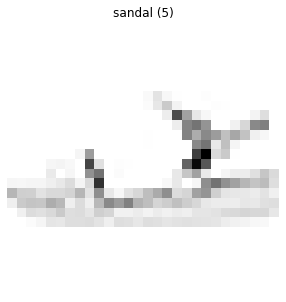

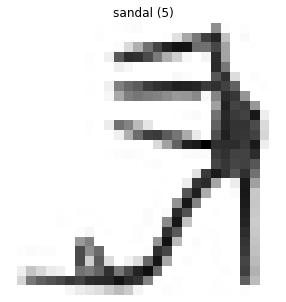

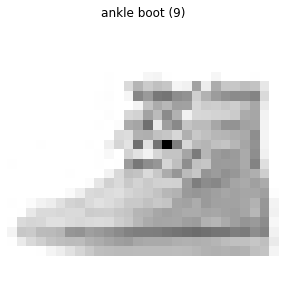

In [7]:
# Visualising random images
for i in np.random.randint(0, 10000, 6):
    plotImage(i)

#### *Resizing Image to Make It Suitable for Applying Convolution Operations*

In [8]:
IMG_SIZE = 28
# Increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("-----------------------------------------------------------------------")
print("Training samples shape:", X_trainr.shape)
print("Testing samples shape:", X_testr.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Training samples shape: (60000, 28, 28, 1)
Testing samples shape: (10000, 28, 28, 1)
-----------------------------------------------------------------------


### Scaling/Normalisation
#### *division by 255 to bring in the range 0 to 1*

In [9]:
X_trainr = X_trainr / 255
X_testr = X_testr / 255

#### *Splitting the Data set into Validation Sets*

In [10]:
# Importing packages
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_trainr,
                                                    y_train,
                                                    test_size=0.2,
                                                    random_state=2020)

In [11]:
print("-----------------------------------------------------------------------")
print("The shape of X_train set:", X_train.shape, end="\n\n")
print("The shape of y_train set:", y_train.shape)
print("-----------------------------------------------------------------------")
print("The shape of X_validation set:", X_validation.shape, end="\n\n")
print("The shape of y_validation set:", y_validation.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The shape of X_train set: (48000, 28, 28, 1)

The shape of y_train set: (48000,)
-----------------------------------------------------------------------
The shape of X_validation set: (12000, 28, 28, 1)

The shape of y_validation set: (12000,)
-----------------------------------------------------------------------


### Creating Deep Neural Netwrok
#### *and training on 60000 traning samples*

In [12]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D
from tensorflow.keras.layers import Flatten, Conv2D

## **Build 1: Simple CNN**

In [13]:
# Creating simple Convolutional Neural Network
fc_model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid",
           activation="relu", input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"), # hidden layers
    Dense(units=10, activation="softmax")
])

In [14]:
# Displaying the fc_model_1 summary
print("-----------------------------------------------------------------------")
print("Here is the FIRST model's summary:-")
display(fc_model_1.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the FIRST model's summary:-
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 

None

-----------------------------------------------------------------------


### Compiling the Model

In [15]:
fc_model_1.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### Training the Model

In [16]:
fc_model_1.fit(X_train, y_train, batch_size=512, epochs=10,
             validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 10s 105ms/step - loss: 0.6262 - accuracy: 0.7917 - val_loss: 0.4066 - val_accuracy: 0.8591
Epoch 2/10
94/94 [==============================] - 10s 109ms/step - loss: 0.3662 - accuracy: 0.8725 - val_loss: 0.3539 - val_accuracy: 0.8785
Epoch 3/10
94/94 [==============================] - 9s 101ms/step - loss: 0.3202 - accuracy: 0.8875 - val_loss: 0.3279 - val_accuracy: 0.8852
Epoch 4/10
94/94 [==============================] - 10s 102ms/step - loss: 0.2962 - accuracy: 0.8947 - val_loss: 0.3176 - val_accuracy: 0.8885
Epoch 5/10
94/94 [==============================] - 10s 102ms/step - loss: 0.2716 - accuracy: 0.9042 - val_loss: 0.2982 - val_accuracy: 0.8930
Epoch 6/10
94/94 [==============================] - 10s 101ms/step - loss: 0.2554 - accuracy: 0.9094 - val_loss: 0.2881 - val_accuracy: 0.8985
Epoch 7/10
94/94 [==============================] - 10s 102ms/step - loss: 0.2451 - accuracy: 0.9123 - val_loss: 0.2869 - val_accuracy: 0.8989


### Evaluation of the Model

In [17]:
fc_loss, fc_accuracy = fc_model_1.evaluate(X_test, y_test)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of FIRST AI Model: ", fc_accuracy * 100, "%",
      sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 1s 4ms/step - loss: 81.2703 - accuracy: 0.8166
-----------------------------------------------------------------------
Accuracy Percentage of FIRST AI Model: 81.66000247001648%
-----------------------------------------------------------------------


### Model Predictions

In [18]:
# Creating a list of predictions of all the test images
y_predictions = fc_model_1.predict(X_test)
y_predictedClasses = [np.argmax(probability) for probability in y_predictions]

In [19]:
# Function to make predictions which takes the index as the only argument
def makePrediction(index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_test[index].reshape(28, 28), cmap="Greys")
    plt.axis("off")
    
    predictionStatus = "Correct Prediction!"
    if y_predictedClasses[index] != y_test[index]:
        predictionStatus = "Incorrect Prediction!"
    
    plt.title(
        "Actual: {} ({})\nPredicted: {} ({})\n{}".format(
            classes[y_test[index]],
            y_test[index],
            classes[y_predictedClasses[index]],
            y_predictedClasses[index],
            predictionStatus
        )
    )
# end function makePrediction()

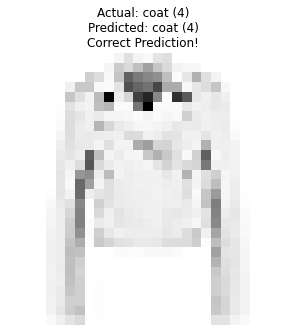

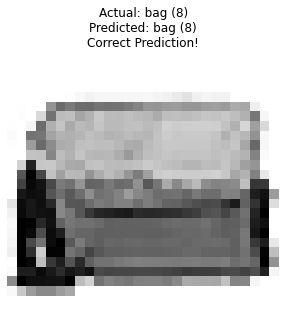

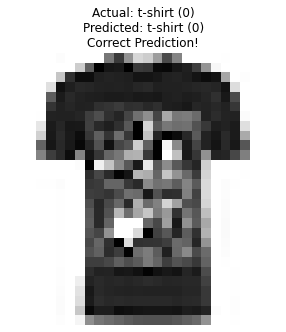

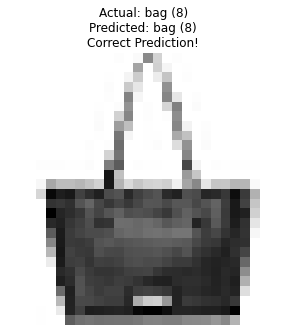

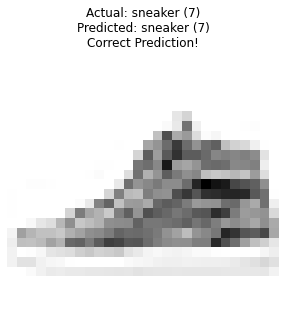

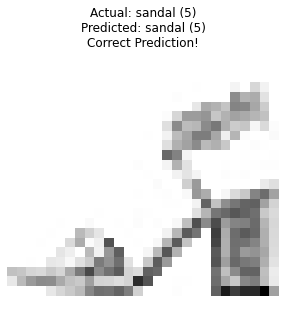

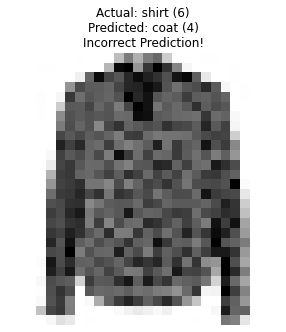

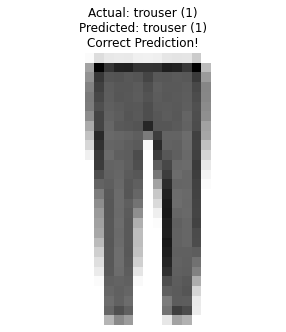

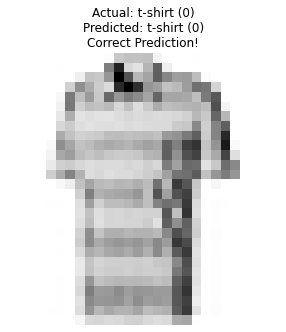

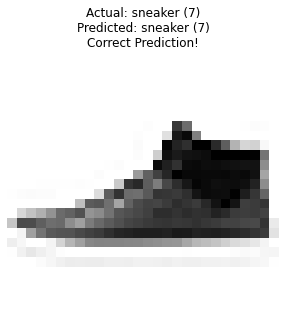

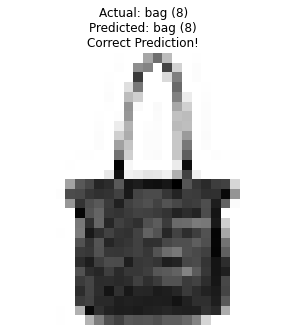

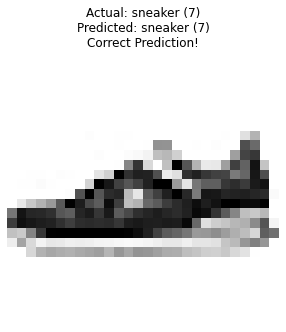

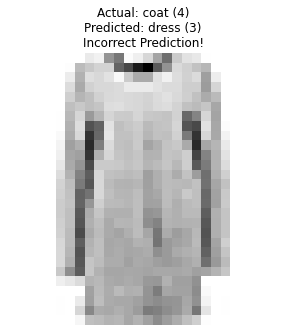

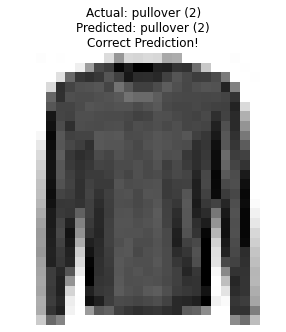

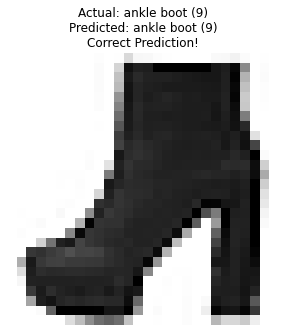

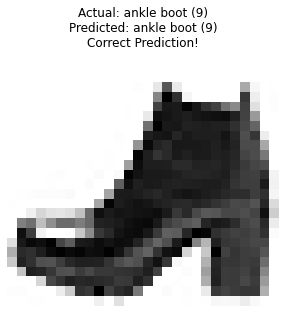

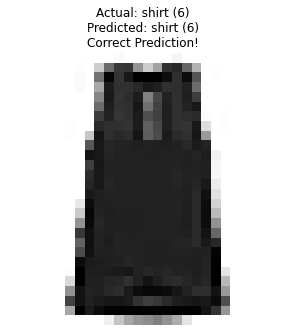

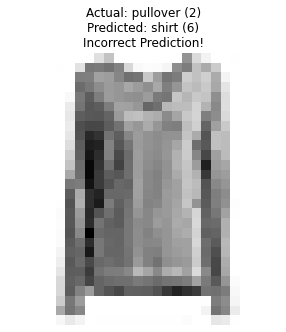

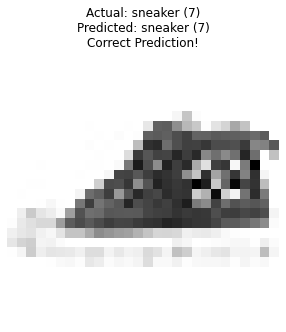

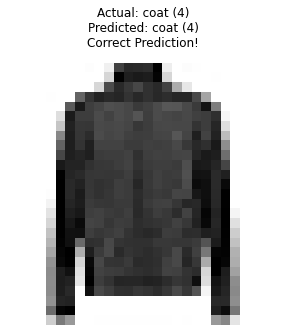

In [20]:
# Making predictions for random indices
for i in np.random.randint(0, 10000, 20):
    makePrediction(i)

### Confusion Matrix

In [21]:
confMatx = tf.math.confusion_matrix(labels=y_test,
                                    predictions=y_predictedClasses)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix For FIRST Model:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix For FIRST Model:
tf.Tensor(
[[663   7  19  19  59   2 215   0  16   0]
 [  0 985   1   2  10   0   0   0   2   0]
 [  8   2 532   2 406   0  48   0   2   0]
 [  3  68  10 745 135   0  31   0   8   0]
 [  0   0   2   6 979   0  13   0   0   0]
 [  0   1   0   0   1 984   0   2   0  12]
 [ 38   3  29  15 414   0 492   0   9   0]
 [  0   0   0   0   0 114   0 846   1  39]
 [  2   2   0   1  10   5   3   2 975   0]
 [  0   0   0   0   1  15   1  17   1 965]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### *Visualising the Confusion Matrix Using Seaborn Library*

Text(0.5, 1.0, 'Heatmap of the Confusion Matrx (for the FIRST Model)')

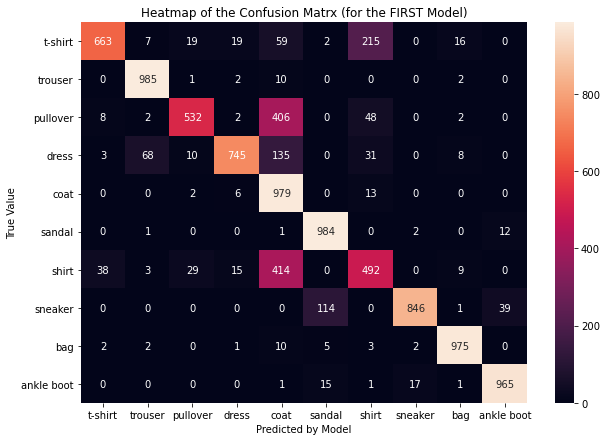

In [22]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d', xticklabels=classes,
           yticklabels=classes)
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")
plt.title("Heatmap of the Confusion Matrx (for the FIRST Model)")

## **Build 2: Complex CNN**

In [23]:
# Importing the required functions
from tensorflow.keras.layers import Dropout

In [24]:
fc_model_2 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid",
           activation="relu", input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding="same",
           activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"), # hidden layers
    Dropout(0.25), # to avoid overfitting
    Dense(units=256, activation="relu"),
    Dropout(0.25),
    Dense(units=128, activation="relu"),
    Dense(units=10, activation="softmax"),
])

In [25]:
# Displaying the fc_model_2 summary
print("-----------------------------------------------------------------------")
print("Here is the SECOND model's summary:-")
display(fc_model_2.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the SECOND model's summary:-
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
           

None

-----------------------------------------------------------------------


### Compiling the Model

In [26]:
fc_model_2.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### Training the Model

In [27]:
fc_model_2.fit(X_train, y_train, batch_size=512, epochs=30,
             validation_data=(X_validation, y_validation))

Epoch 1/30
94/94 [==============================] - 13s 132ms/step - loss: 1.0226 - accuracy: 0.6182 - val_loss: 0.5929 - val_accuracy: 0.7684
Epoch 2/30
94/94 [==============================] - 12s 130ms/step - loss: 0.5740 - accuracy: 0.7827 - val_loss: 0.4794 - val_accuracy: 0.8175
Epoch 3/30
94/94 [==============================] - 12s 132ms/step - loss: 0.4850 - accuracy: 0.8215 - val_loss: 0.4237 - val_accuracy: 0.8415
Epoch 4/30
94/94 [==============================] - 12s 132ms/step - loss: 0.4253 - accuracy: 0.8450 - val_loss: 0.3936 - val_accuracy: 0.8574
Epoch 5/30
94/94 [==============================] - 13s 135ms/step - loss: 0.3878 - accuracy: 0.8585 - val_loss: 0.3583 - val_accuracy: 0.8674
Epoch 6/30
94/94 [==============================] - 13s 135ms/step - loss: 0.3586 - accuracy: 0.8692 - val_loss: 0.3469 - val_accuracy: 0.8745
Epoch 7/30
94/94 [==============================] - 13s 136ms/step - loss: 0.3347 - accuracy: 0.8769 - val_loss: 0.3246 - val_accuracy: 0.8806

### Evaluation of the Model

In [28]:
fc_loss, fc_accuracy = fc_model_2.evaluate(X_test, y_test)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of SECOND AI Model: ", fc_accuracy * 100, "%",
      sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 2s 5ms/step - loss: 82.2016 - accuracy: 0.8003
-----------------------------------------------------------------------
Accuracy Percentage of SECOND AI Model: 80.03000020980835%
-----------------------------------------------------------------------


### Model Predictions

In [29]:
# Creating a list of predictions of all the test images
y_predictions = fc_model_2.predict(X_test)
y_predictedClasses = [np.argmax(probability) for probability in y_predictions]

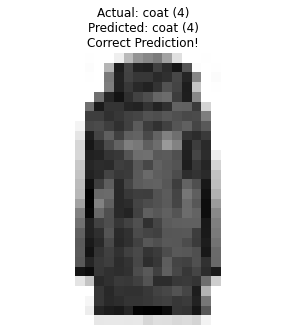

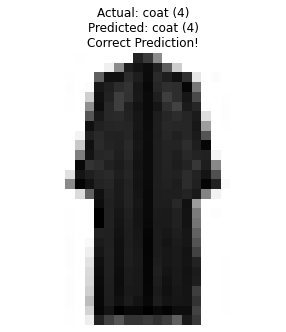

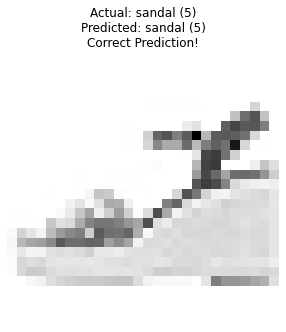

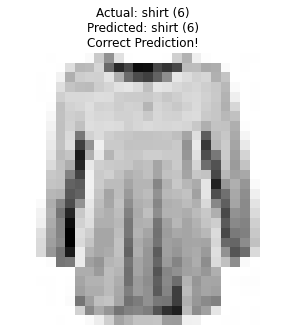

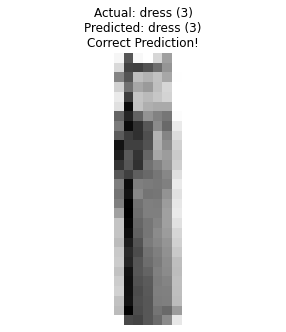

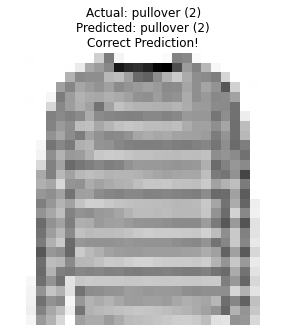

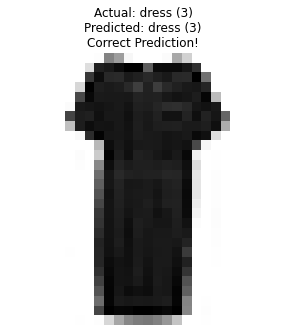

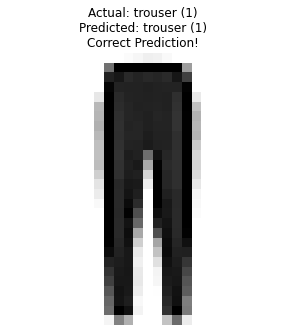

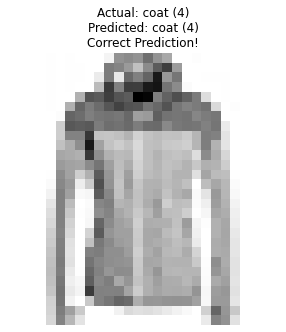

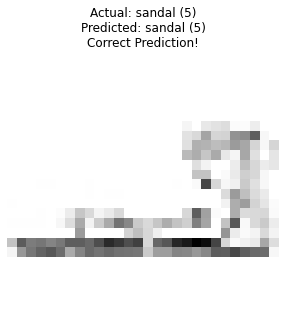

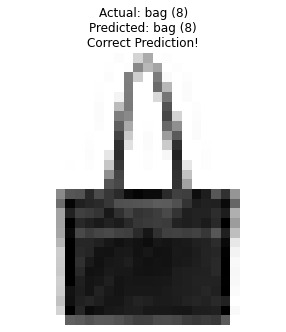

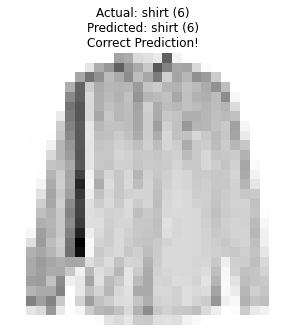

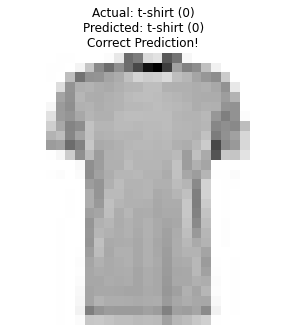

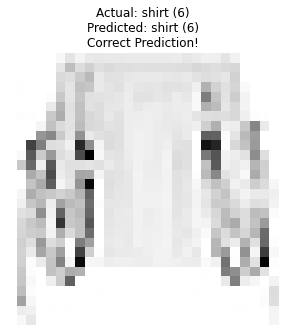

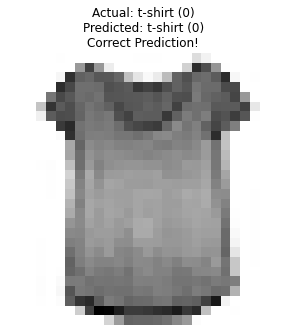

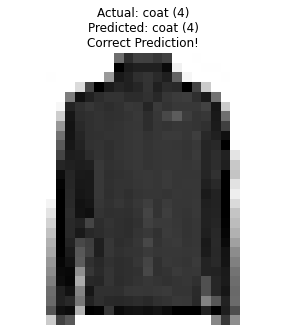

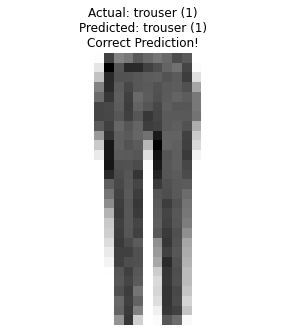

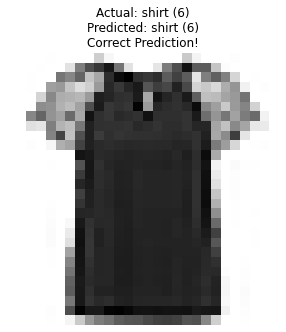

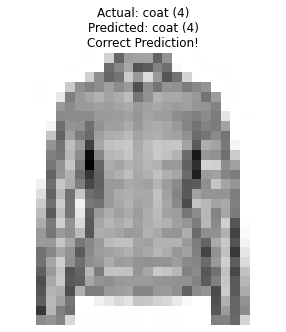

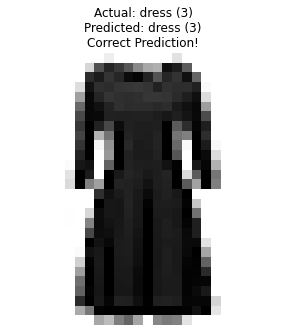

In [30]:
# Making predictions for random indices
for i in np.random.randint(300, 10000, 20):
    makePrediction(i)

### Confusion Matrix

In [31]:
confMatx = tf.math.confusion_matrix(labels=y_test,
                                    predictions=y_predictedClasses)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix For SECOND Model:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix For SECOND Model:
tf.Tensor(
[[652   9  10  13  46   1 249   0  20   0]
 [  2 979   0   8   9   0   0   0   2   0]
 [ 12   0 409   3 463   0 104   0   9   0]
 [ 13  37   5 761 124   1  52   0   5   2]
 [  0   1   2   5 975   0  15   0   2   0]
 [  0   0   0   0   0 994   0   1   1   4]
 [ 44   4  12  13 374   0 536   0  17   0]
 [  0   0   0   0   0 192   0 774   2  32]
 [  1   1   1   1  15   5   3   1 972   0]
 [  0   0   0   0   0  24   0  21   4 951]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### *Visualising the Confusion Matrix*

Text(0.5, 1.0, 'Heatmap of the Confusion Matrx (for SECOND Model)')

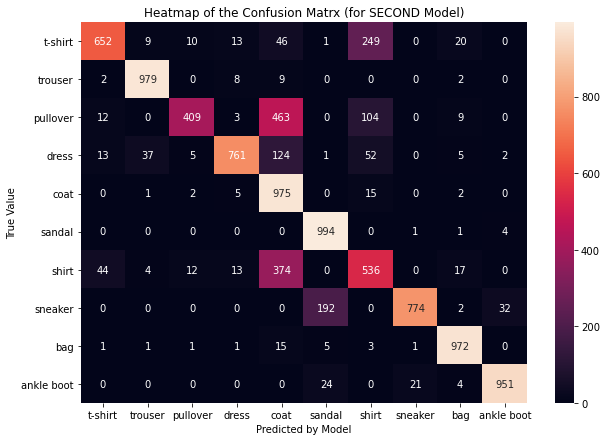

In [32]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d', xticklabels=classes,
           yticklabels=classes)
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")
plt.title("Heatmap of the Confusion Matrx (for SECOND Model)")

## **Build 3: More Complex CNN**

In [33]:
# Building the third model which has even more dense (hidden) layers
fc_model_3 = Sequential([
    Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="valid",
           activation="relu", input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding="same",
           activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding="same",
           activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"), # hidden layers
    Dropout(0.25), # to avoid overfitting
    Dense(units=256, activation="relu"),
    Dropout(0.5),
    Dense(units=256, activation="relu"),
    Dropout(0.25),
    Dense(units=128, activation="relu"),
    Dropout(0.10),
    Dense(units=10, activation="softmax"),
])

In [34]:
# Displaying the fc_model_3 summary
print("-----------------------------------------------------------------------")
print("Here is the THIRD model's summary:-")
display(fc_model_3.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the THIRD model's summary:-
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          73792     
            

None

-----------------------------------------------------------------------


### Compiling the Model

In [35]:
fc_model_3.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### Training the Model

In [36]:
fc_model_3.fit(X_train, y_train, batch_size=512, epochs=50,
             validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 29s 303ms/step - loss: 1.2180 - accuracy: 0.5130 - val_loss: 0.6284 - val_accuracy: 0.7525
Epoch 2/50
94/94 [==============================] - 29s 306ms/step - loss: 0.6043 - accuracy: 0.7729 - val_loss: 0.5058 - val_accuracy: 0.8025
Epoch 3/50
94/94 [==============================] - 29s 305ms/step - loss: 0.4892 - accuracy: 0.8176 - val_loss: 0.4211 - val_accuracy: 0.8421
Epoch 4/50
94/94 [==============================] - 29s 303ms/step - loss: 0.4299 - accuracy: 0.8448 - val_loss: 0.3776 - val_accuracy: 0.8612
Epoch 5/50
94/94 [==============================] - 28s 301ms/step - loss: 0.3714 - accuracy: 0.8669 - val_loss: 0.3646 - val_accuracy: 0.8681
Epoch 6/50
94/94 [==============================] - 28s 302ms/step - loss: 0.3352 - accuracy: 0.8802 - val_loss: 0.3263 - val_accuracy: 0.8832
Epoch 7/50
94/94 [==============================] - 28s 302ms/step - loss: 0.3136 - accuracy: 0.8901 - val_loss: 0.3133 - val_accuracy: 0.8874

### Evaluation of the Model

In [37]:
fc_loss, fc_accuracy = fc_model_3.evaluate(X_test, y_test)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of THIRD AI Model: ", fc_accuracy * 100, "%",
      sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 2s 7ms/step - loss: 141.8305 - accuracy: 0.7838
-----------------------------------------------------------------------
Accuracy Percentage of THIRD AI Model: 78.38000059127808%
-----------------------------------------------------------------------


### Model Predictions

In [38]:
# Creating a list of predictions of all the test images
y_predictions = fc_model_3.predict(X_test)
y_predictedClasses = [np.argmax(probability) for probability in y_predictions]

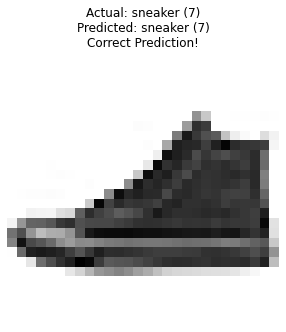

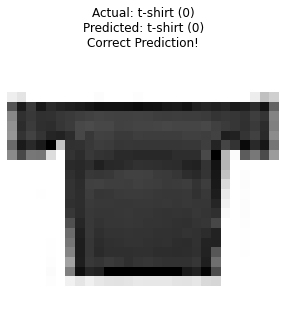

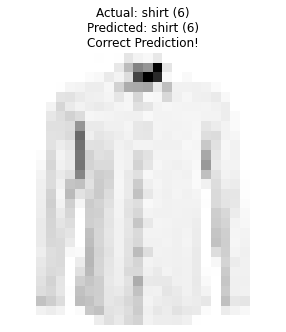

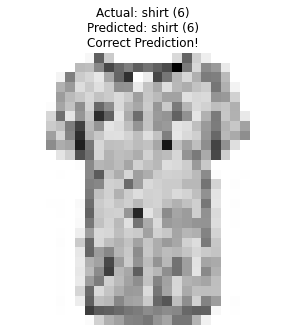

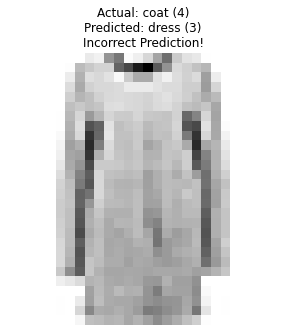

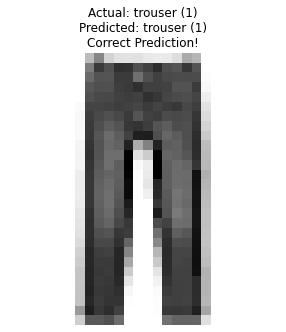

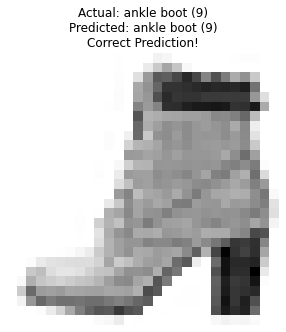

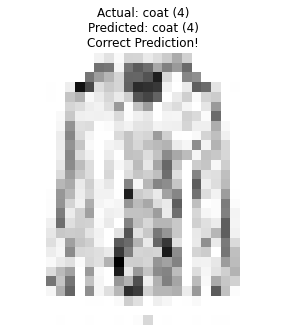

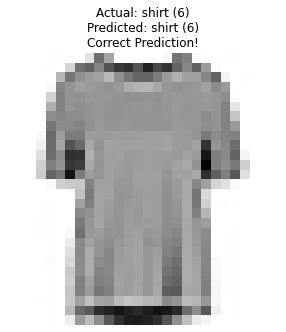

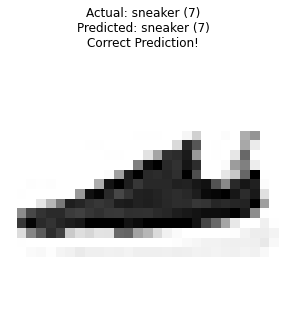

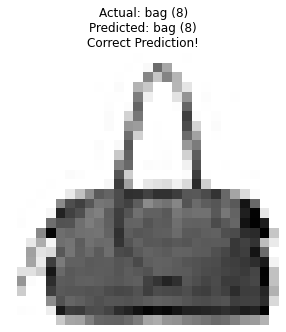

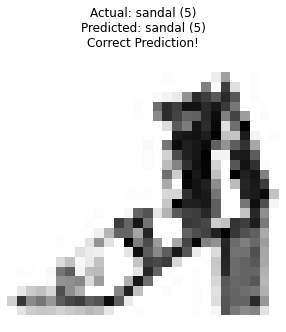

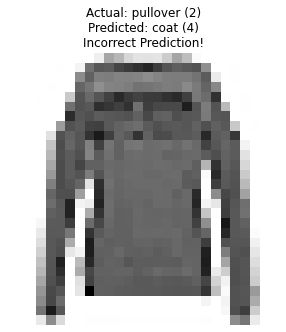

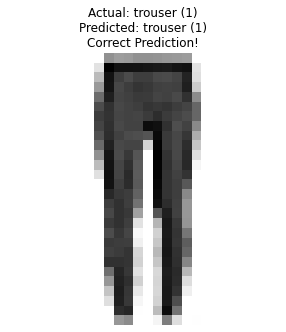

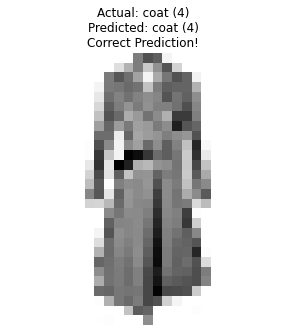

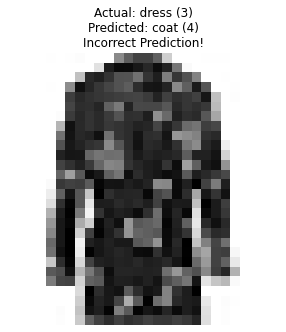

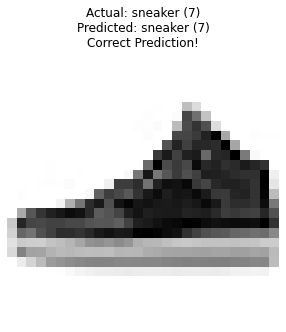

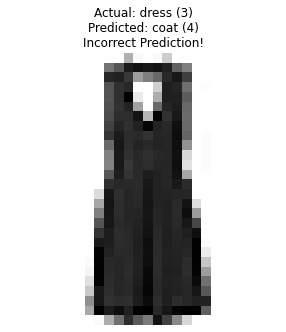

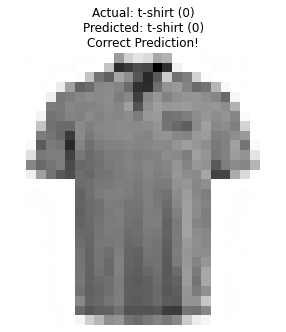

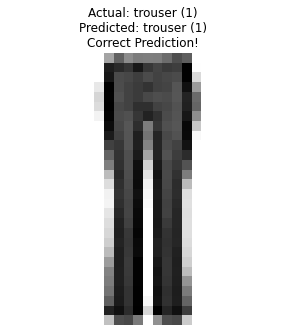

In [39]:
# Making predictions for random indices
for i in np.random.randint(500, 8989, 20):
    makePrediction(i)

### Confusion Matrix

In [40]:
confMatx = tf.math.confusion_matrix(labels=y_test,
                                    predictions=y_predictedClasses)

print("-----------------------------------------------------------------------")
print("Simple Confusion Matrix For THIRD Model:", confMatx, sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Simple Confusion Matrix For THIRD Model:
tf.Tensor(
[[576  16   5   5  27   0 351   0  17   3]
 [  2 984   0   2   7   0   2   0   2   1]
 [ 19   4 392   4 274   0 294   0  12   1]
 [ 22  71   1 576 203   0 114   2   7   4]
 [  0   1   6   4 917   0  69   0   3   0]
 [  0   0   0   0   0 916   1  15  59   9]
 [ 31   3   6   6 205   0 732   0  15   2]
 [  3   0   0   0   0  82   1 829  31  54]
 [  2   0   1   1  16   5   9   0 966   0]
 [  0   0   0   0   0  14   1  25  10 950]], shape=(10, 10), dtype=int32)
-----------------------------------------------------------------------


#### *Visualising the Confusion Matrix*

Text(0.5, 1.0, 'Heatmap of the Confusion Matrx (for THIRD Model)')

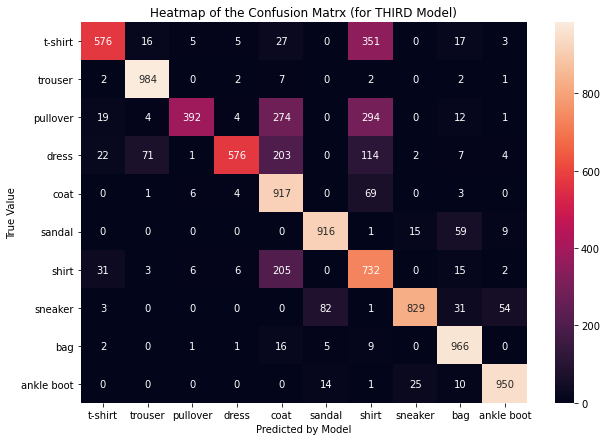

In [41]:
import seaborn as sn

plt.figure(figsize = (10, 7))
sn.heatmap(confMatx, annot=True, fmt='d', xticklabels=classes,
           yticklabels=classes)
plt.xlabel("Predicted by Model")
plt.ylabel("True Value")
plt.title("Heatmap of the Confusion Matrx (for THIRD Model)")

# **---------------------------------------------------------------------------------------------------**